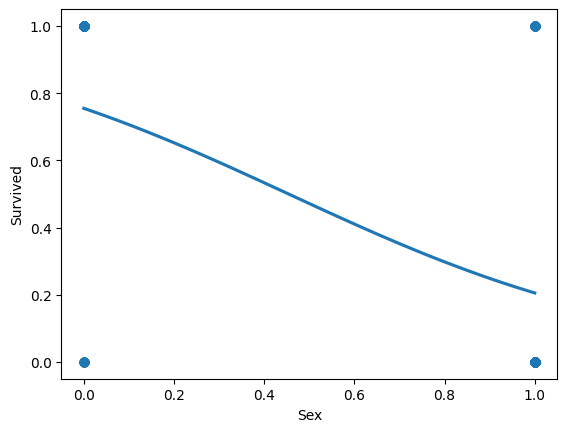

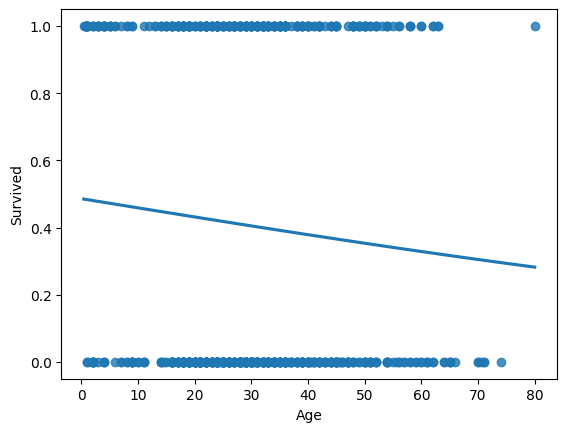

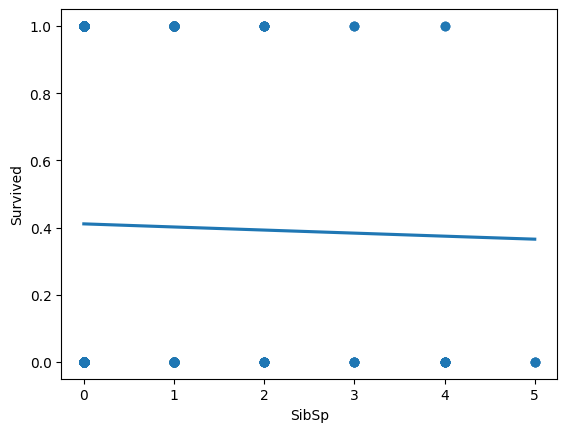

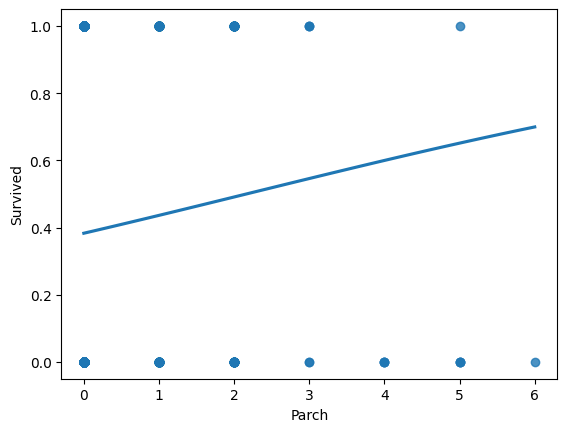

In [35]:
import pandas as p
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sb

df = p.read_csv("titanic.csv");
df = df.drop(columns=['Name'])
df = df.drop(columns=['Ticket', 'Fare', 'Cabin', 'Embarked'])
df = df.dropna()
df['Sex'] = df['Sex'].replace(['male'], 1)
df['Sex'] = df['Sex'].replace(['female'], 0)

plot = sb.regplot(x=df['Sex'], y=df['Survived'], data=df, logistic=True, ci=None)
plt.show()
sb.regplot(x=df['Age'], y=df['Survived'], data=df, logistic=True, ci=None)
plt.show()
sb.regplot(x=df['SibSp'], y=df['Survived'], data=df, logistic=True, ci=None)
plt.show()
sb.regplot(x=df['Parch'], y=df['Survived'], data=df, logistic=True, ci=None)
plt.show()

***Splitting the Data, Fitting to Logistic Regression Model and Making Predictions***

In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.33)

logistic_model = LogisticRegression(max_iter=1000)
start_t = time.time()
logistic_model.fit(X_train, y_train)
print("Time elapsed for fit:", time.time() - start_t, "seconds")
start_t = time.time()
preds = logistic_model.predict(X_test)
print("Time elapsed for predict:", time.time() - start_t, "seconds\n")

Time elapsed for fit: 0.021114110946655273 seconds
Time elapsed for predict: 0.0018758773803710938 seconds



***Scores for Logistic Regression Model***

Accuracy: 0.8177966101694916
Precision: 0.7590361445783133
Recall: 0.7325581395348837
F1-score: 0.7455621301775147

Confusion Matrix


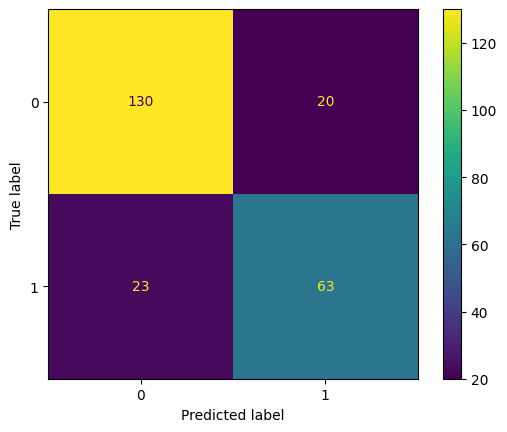

In [37]:
accuracy = logistic_model.score(X_test, y_test)
print("Accuracy:", accuracy)
precision = metrics.precision_score(y_test, preds)
print("Precision:", precision)
recall = metrics.recall_score(y_test, preds)
print("Recall:", recall)
f1 = metrics.f1_score(y_test, preds)
print("F1-score:", f1)
print()
print("Confusion Matrix")
cm = metrics.confusion_matrix(y_test, preds, labels=logistic_model.classes_)
display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
display.plot()
plt.show()